In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
#Load data
power=pd.read_csv('database_IND.csv')
power

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
power.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
431,IND,India,LOWER METTUR,IND0000238,120.0,11.6425,77.7583,Hydro,NaN,NaN,...,2019.0,NaN,265.37645,222.25315,91.80865,131.29025,219.21840,NaN,Central Electricity Authority,NaN
572,IND,India,PANNIAR,IND0000323,30.0,9.9731,77.0281,Hydro,NaN,NaN,...,2019.0,NaN,154.12550,173.42850,62.01835,128.82265,114.01705,NaN,Central Electricity Authority,NaN
765,IND,India,Shree Sangli Wind Farm,WRI1026785,16.5,17.3031,74.6310,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,IND,India,SANGLI KRANTI,WRI1019981,19.7,17.1354,74.4272,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,IND,India,Sonu Wind Farm,WRI1026764,8.4,27.2081,70.6958,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
power.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
power.shape

(907, 27)

In [6]:
power.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
power.duplicated().sum()

0

In [8]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

observations....

* This data set contains about 40% missing data
* There are 27 columns and 907 rows present
* This data has No duplicated values 
* This dataset occupy 192 kb memory and data type is float64(15), object(12)

In [9]:
power.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


<Axes: >

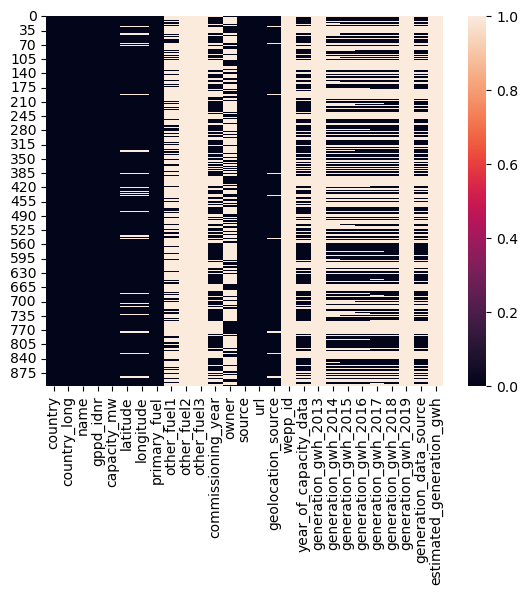

In [10]:
sns.heatmap(power.isnull())

IN this data there is some columns which have not a single input data 

In [11]:
power.isnull().mean()*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [12]:
# drop columns which have  100 % data missing
power.drop('estimated_generation_gwh',axis=1,inplace=True)

In [13]:
power.drop(columns=['generation_gwh_2013','wepp_id','other_fuel3','other_fuel2'],inplace=True)

In [14]:
power.drop('generation_gwh_2019',axis=1,inplace=True)

In [17]:
#removing country and Country_long containing same value for all coloumns so they are not relavent
power.drop(columns=["country","country_long"],axis=1,inplace=True)

In [20]:
#Removing irrevalant features
power.drop(columns=['year_of_capacity_data','name','generation_data_source','owner'],axis=1,inplace=True)

In [30]:
power.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [32]:
power.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [36]:
# Filling missing values in lattitude using mean
power["latitude"] = power["latitude"].fillna(power["latitude"].mean())

In [47]:
#let us replace the values  using knn imputers
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(power[["capacity_mw","generation_gwh_2014"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2014"]
knn_imp

,capacity_mw,generation_gwh_2014
0,2.5,16.779017
1,98.0,324.532517
2,39.2,85.185267
3,135.0,617.789264
4,1800.0,3035.550000
...,...,...
902,1600.0,3691.517167
903,3.0,16.779017
904,25.5,16.779017
905,80.0,213.394333


In [49]:
power["generation_gwh_2014"]=knn_imp["generation_gwh_2014"]
power['generation_gwh_2014']

0        16.779017
1       324.532517
2        85.185267
3       617.789264
4      3035.550000
          ...     
902    3691.517167
903      16.779017
904      16.779017
905     213.394333
906      16.779017
Name: generation_gwh_2014, Length: 907, dtype: float64

In [50]:
#generation_gwh_2015
knn_imp=pd.DataFrame(knnimp.fit_transform(power[["capacity_mw","generation_gwh_2015"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2015"]
power["generation_gwh_2015"]=knn_imp["generation_gwh_2015"]

#generation_gwh_2016
knn_imp=pd.DataFrame(knnimp.fit_transform(power[["capacity_mw","generation_gwh_2016"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2016"]
power["generation_gwh_2016"]=knn_imp["generation_gwh_2016"]

#generation_gwh_2017
knn_imp=pd.DataFrame(knnimp.fit_transform(power[["capacity_mw","generation_gwh_2017"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2017"]
power["generation_gwh_2017"]=knn_imp["generation_gwh_2017"]

#generation_gwh_2018
knn_imp=pd.DataFrame(knnimp.fit_transform(power[["capacity_mw","generation_gwh_2018"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2018"]
power["generation_gwh_2018"]=knn_imp["generation_gwh_2018"]

power


,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450


In [51]:
# Replacing the null value by its mode 
power["other_fuel1"] = power["other_fuel1"].fillna(power["other_fuel1"].mode()[0])

In [52]:
# Filling null values by its mode 
power["geolocation_source"] = power["geolocation_source"].fillna(power["geolocation_source"].mode()[0])

In [53]:
# Filling null values using their median values
power["longitude"] = power["longitude"].fillna(power["longitude"].median())
power["commissioning_year"] = power["commissioning_year"].fillna(power["commissioning_year"].median())

<Axes: >

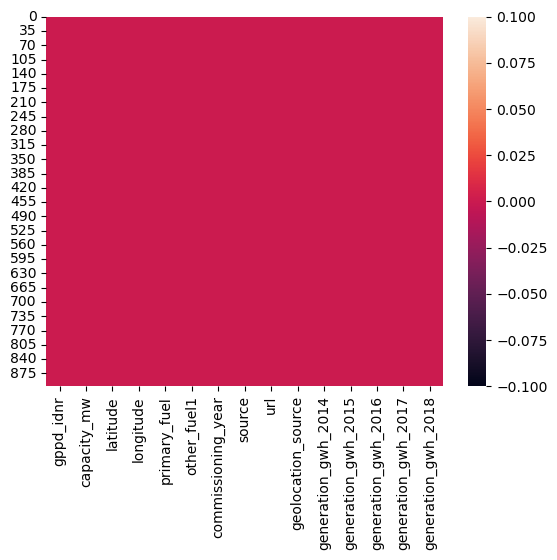

In [54]:
sns.heatmap(power.isnull())

In [55]:
power['Powerplant_age']=2019-power['commissioning_year']
power.drop('commissioning_year',axis=1,inplace=True)
power

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [57]:
power.drop('url',axis=1,inplace=True)

In [59]:
# Statistical analylisis
power.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
generation_gwh_2014,907.0,1216.741950,2944.274717,0.0000,16.779017,171.853083,926.055500,28127.000
generation_gwh_2015,907.0,1225.073916,3119.361453,0.0000,13.293200,139.546801,735.113025,30539.000
generation_gwh_2016,907.0,1247.908108,3138.569942,0.0000,8.974900,131.021600,780.149650,30015.000
generation_gwh_2017,907.0,1294.299953,3187.953881,0.0000,22.244883,128.822650,817.977250,35116.000
generation_gwh_2018,907.0,1348.291762,3293.148855,0.0000,47.968950,133.912800,810.733240,35136.000
Powerplant_age,907.0,20.271224,13.158621,1.0000,16.000000,18.000000,21.000000,92.000


1.The counts of columns are same which means there are no missing values present in the dataset.

2.The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

3.The median is bit greater than the mean in the column latitude which means it is skewed to left.

4.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

5.The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.

In [60]:
# checking for categorical columns
categorical_col=[]
for i in power.dtypes.index:
    if power.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [61]:
# checking for numerical columns
numerical_col=[]
for i in power.dtypes.index:
    if power.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']


### Univariate Analysis 

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64


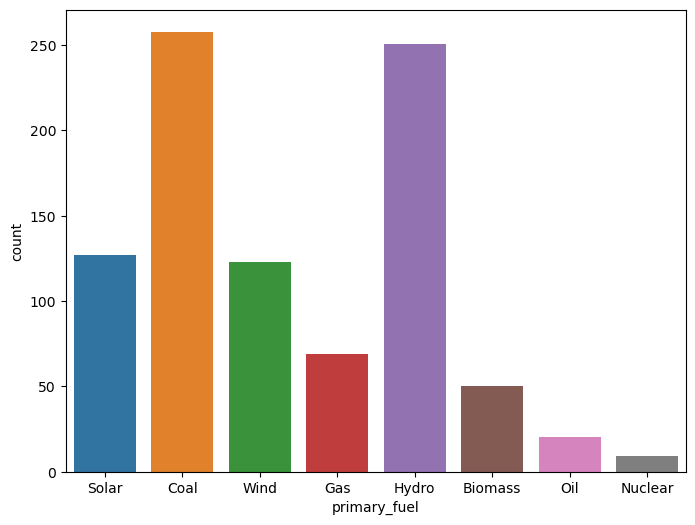

In [63]:
print(power["primary_fuel"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(power,x="primary_fuel")
plt.show()

From above we can explain that coal and Hydro fuel were highly used.In some places solar and wind were used  and in few places Gas and Biomass is used. The use of oil and Nuclear are very rare

other_fuel1
Oil             904
Gas               2
Cogeneration      1
Name: count, dtype: int64


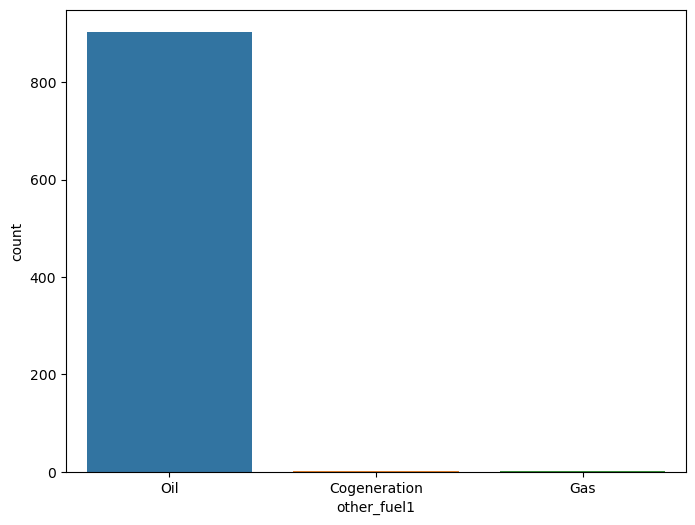

In [64]:
print(power["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(power,x="other_fuel1")
plt.show()

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


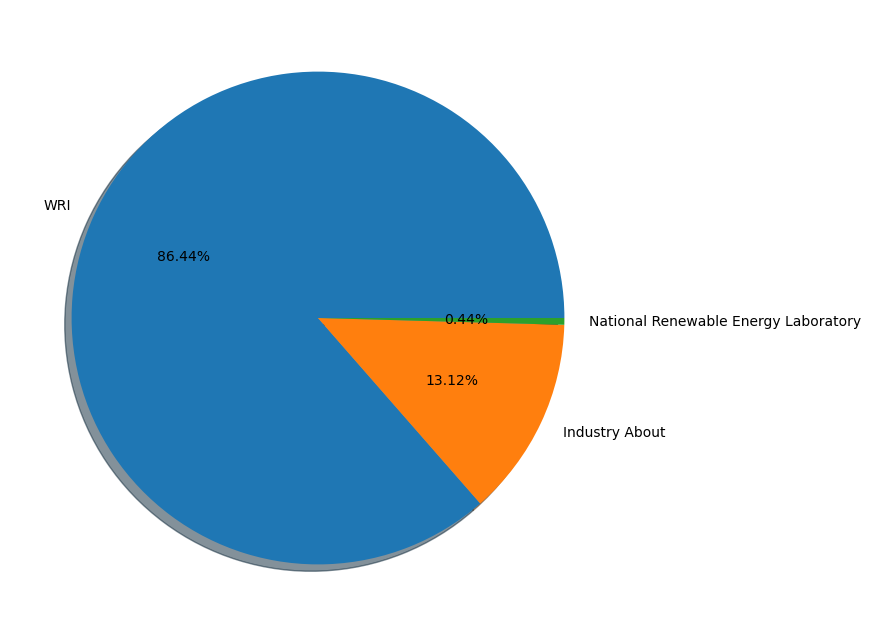

In [66]:
print(power["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(power['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

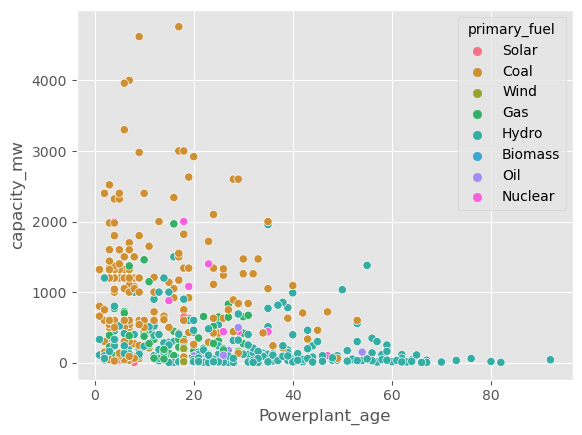

In [67]:
# Bivarient plotting u
plt.style.use('ggplot')
sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = power)
plt.show()

Old Power plants were using gas and hydro mainly, coal type is using to produce high capacity.

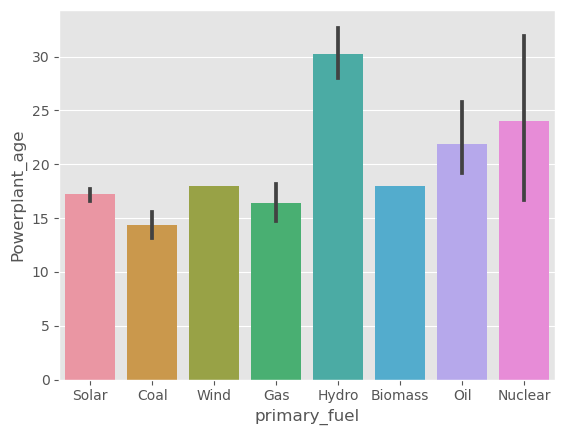

In [68]:
#lets have a look on relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Powerplant_age", data = power)
plt.show()

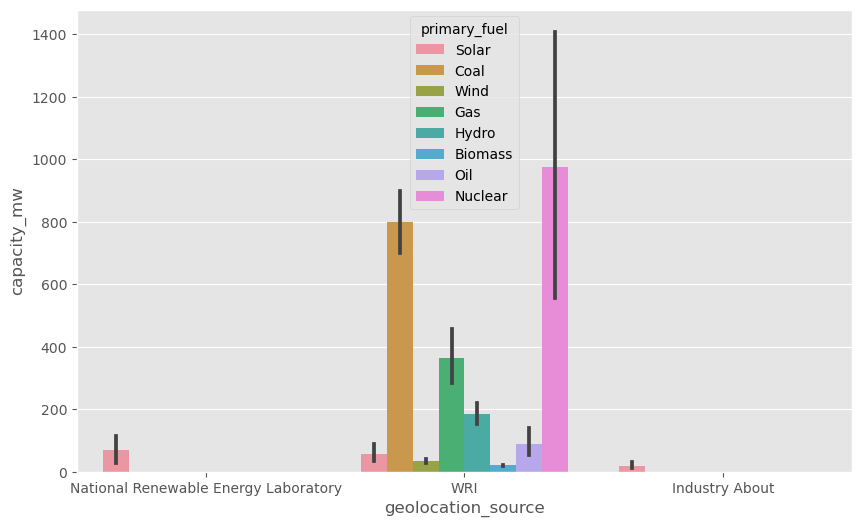

In [69]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = power,hue='primary_fuel')
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more tahn 350 mega watts. The geolacation source Industry About has less capacity. In WRI all sources of power is used

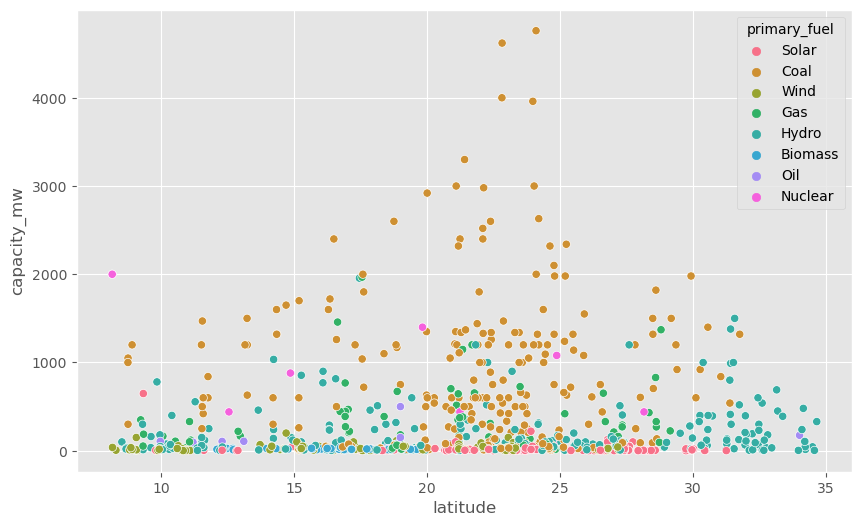

In [71]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.scatterplot(power,x='latitude',y="capacity_mw",hue='primary_fuel');

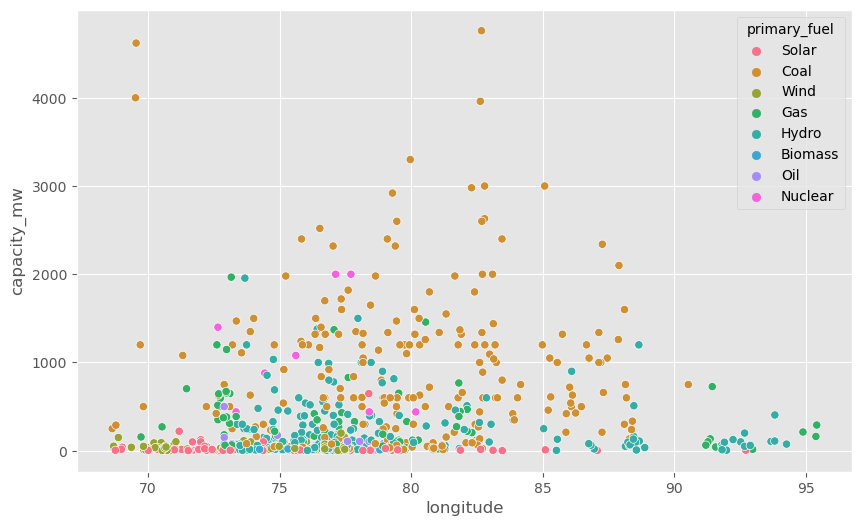

In [72]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')

sns.scatterplot(power,x='longitude',y="capacity_mw",hue='primary_fuel');

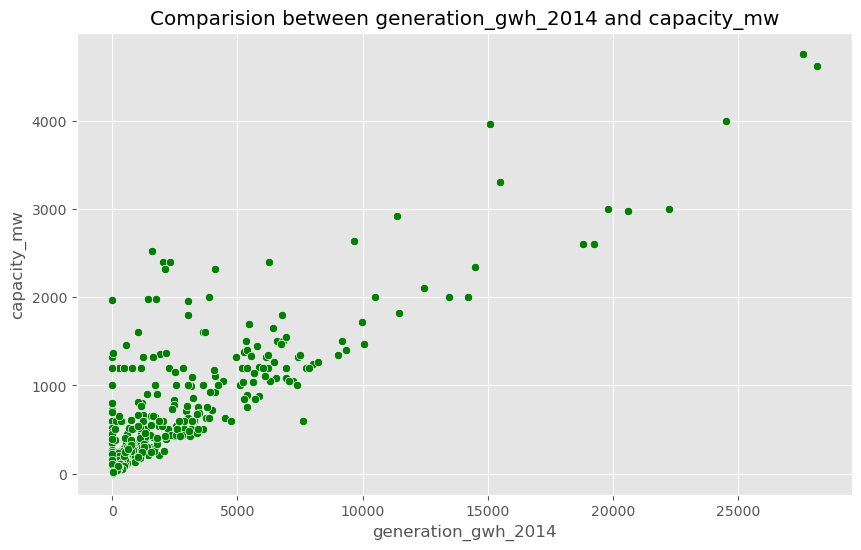

In [73]:
#Lets check the capacity of the plant in generation_gwh_2014
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = power,color="g")
plt.show()

We can noticed the linear relationship between the feature and the label. Here the electricity generation reported for the year 2014 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

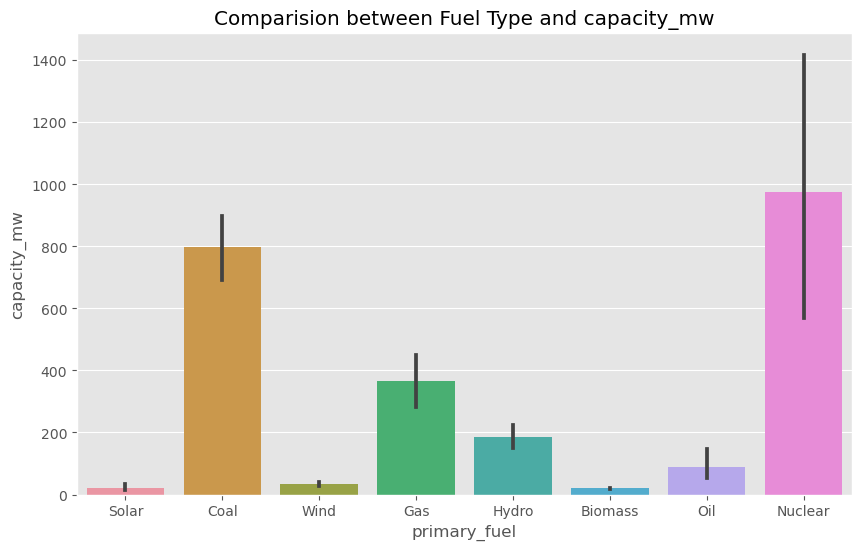

In [74]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = power)
plt.show()

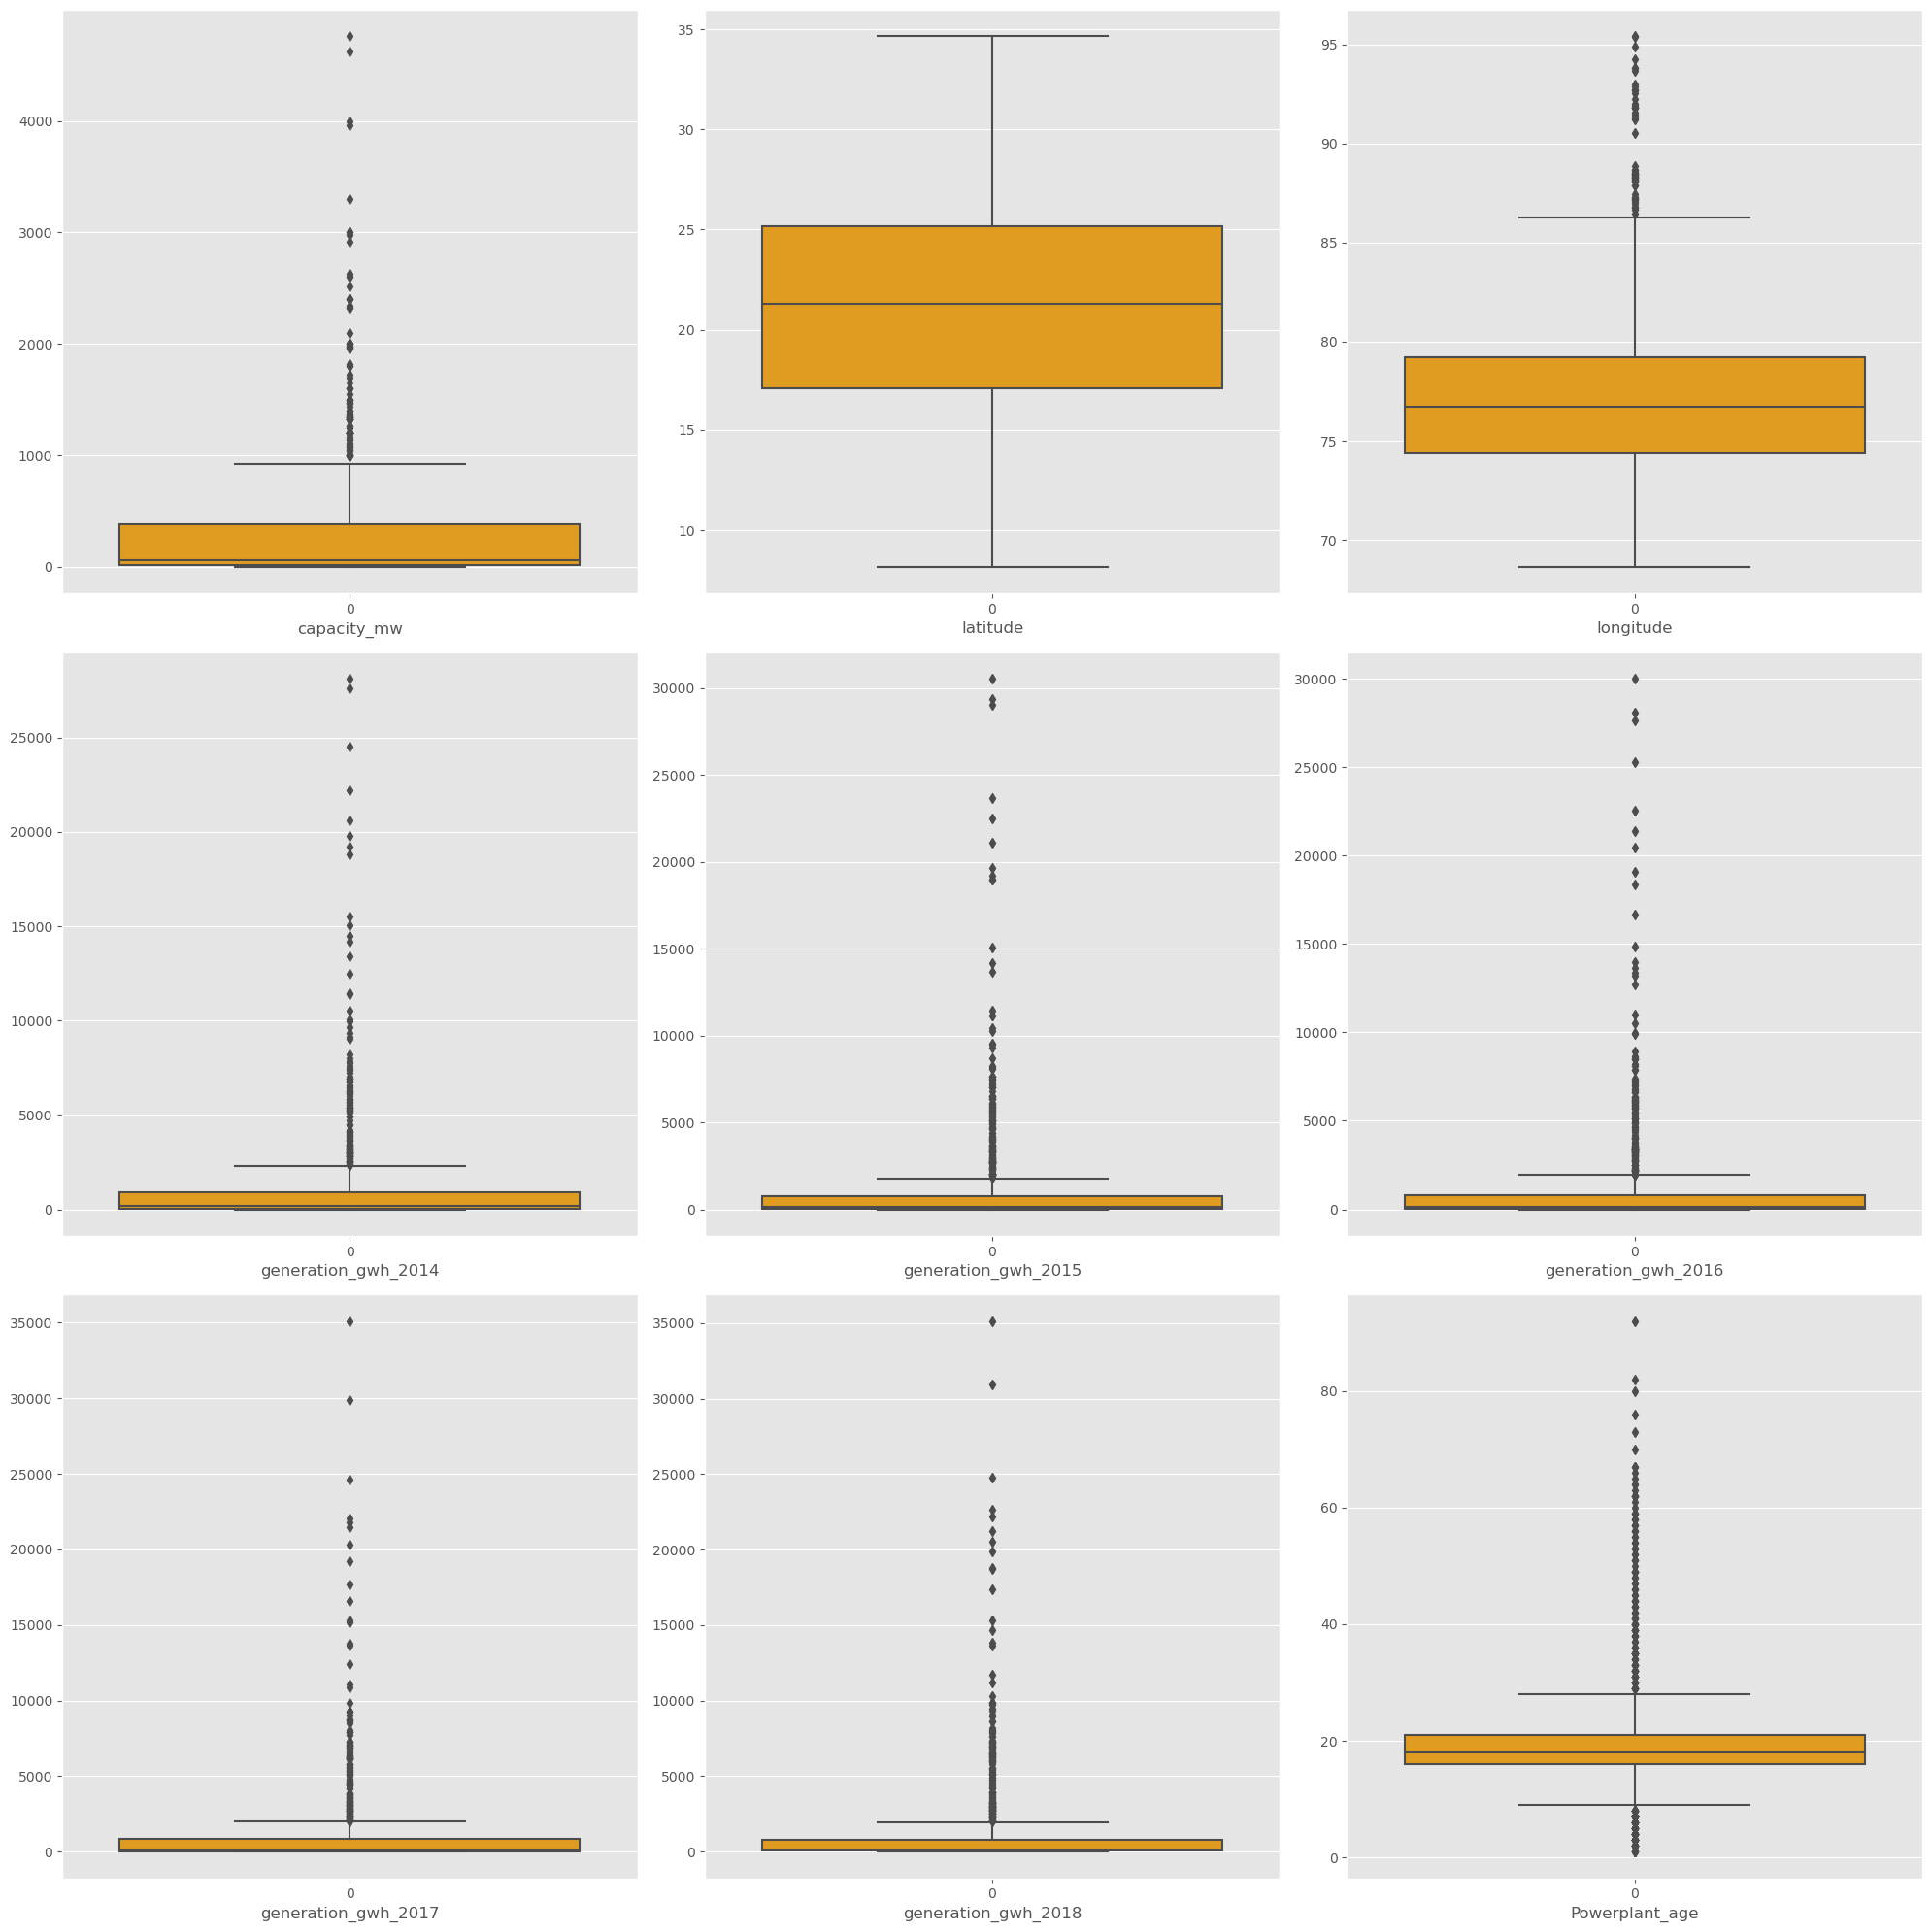

In [75]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(power[column],color="orange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

all features contained outliers except latitude column.

In [76]:
features = power[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,0.869917,0.407783,0.388685,0.394962,0.399239,0.395075,0.933076
1,0.585590,0.303199,0.338753,0.317101,0.340211,0.318779,0.172699
2,1.673567,0.384536,0.356870,0.361220,0.347875,0.349436,0.172699
3,2.895239,0.203542,0.122313,0.115372,0.197893,0.219380,0.400812
4,1.035238,0.618085,1.504758,1.592397,1.284064,1.801917,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.841002,0.392630,0.323355,0.134612,0.201071,1.313265
903,0.153415,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
904,0.383592,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
905,0.764564,0.340967,0.332867,0.328925,0.329901,0.331681,0.172699


In [77]:
# Creating new dataframe
new_df = power[(z<3).all(axis=1)] 
new_df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [78]:
power.shape

(907, 14)

In [79]:
#check % of data loss
(907-852)/907*100

6.063947078280044

In [80]:
#Encoding categorical columns
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,108,1
1,1,2,173,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,76,0
904,7,2,21,2
905,1,2,59,2


In [82]:
new_df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
Powerplant_age         float64
dtype: object

In [83]:
new_df.drop('gppd_idnr',axis=1,inplace=True)

In [84]:
new_df.skew()

capacity_mw             2.178028
latitude               -0.114376
longitude               0.944500
primary_fuel            0.418465
other_fuel1           -19.820871
source                  1.744999
geolocation_source     -2.068499
generation_gwh_2014     2.562088
generation_gwh_2015     2.519395
generation_gwh_2016     2.504234
generation_gwh_2017     2.430029
generation_gwh_2018     2.502936
Powerplant_age          1.278164
dtype: float64

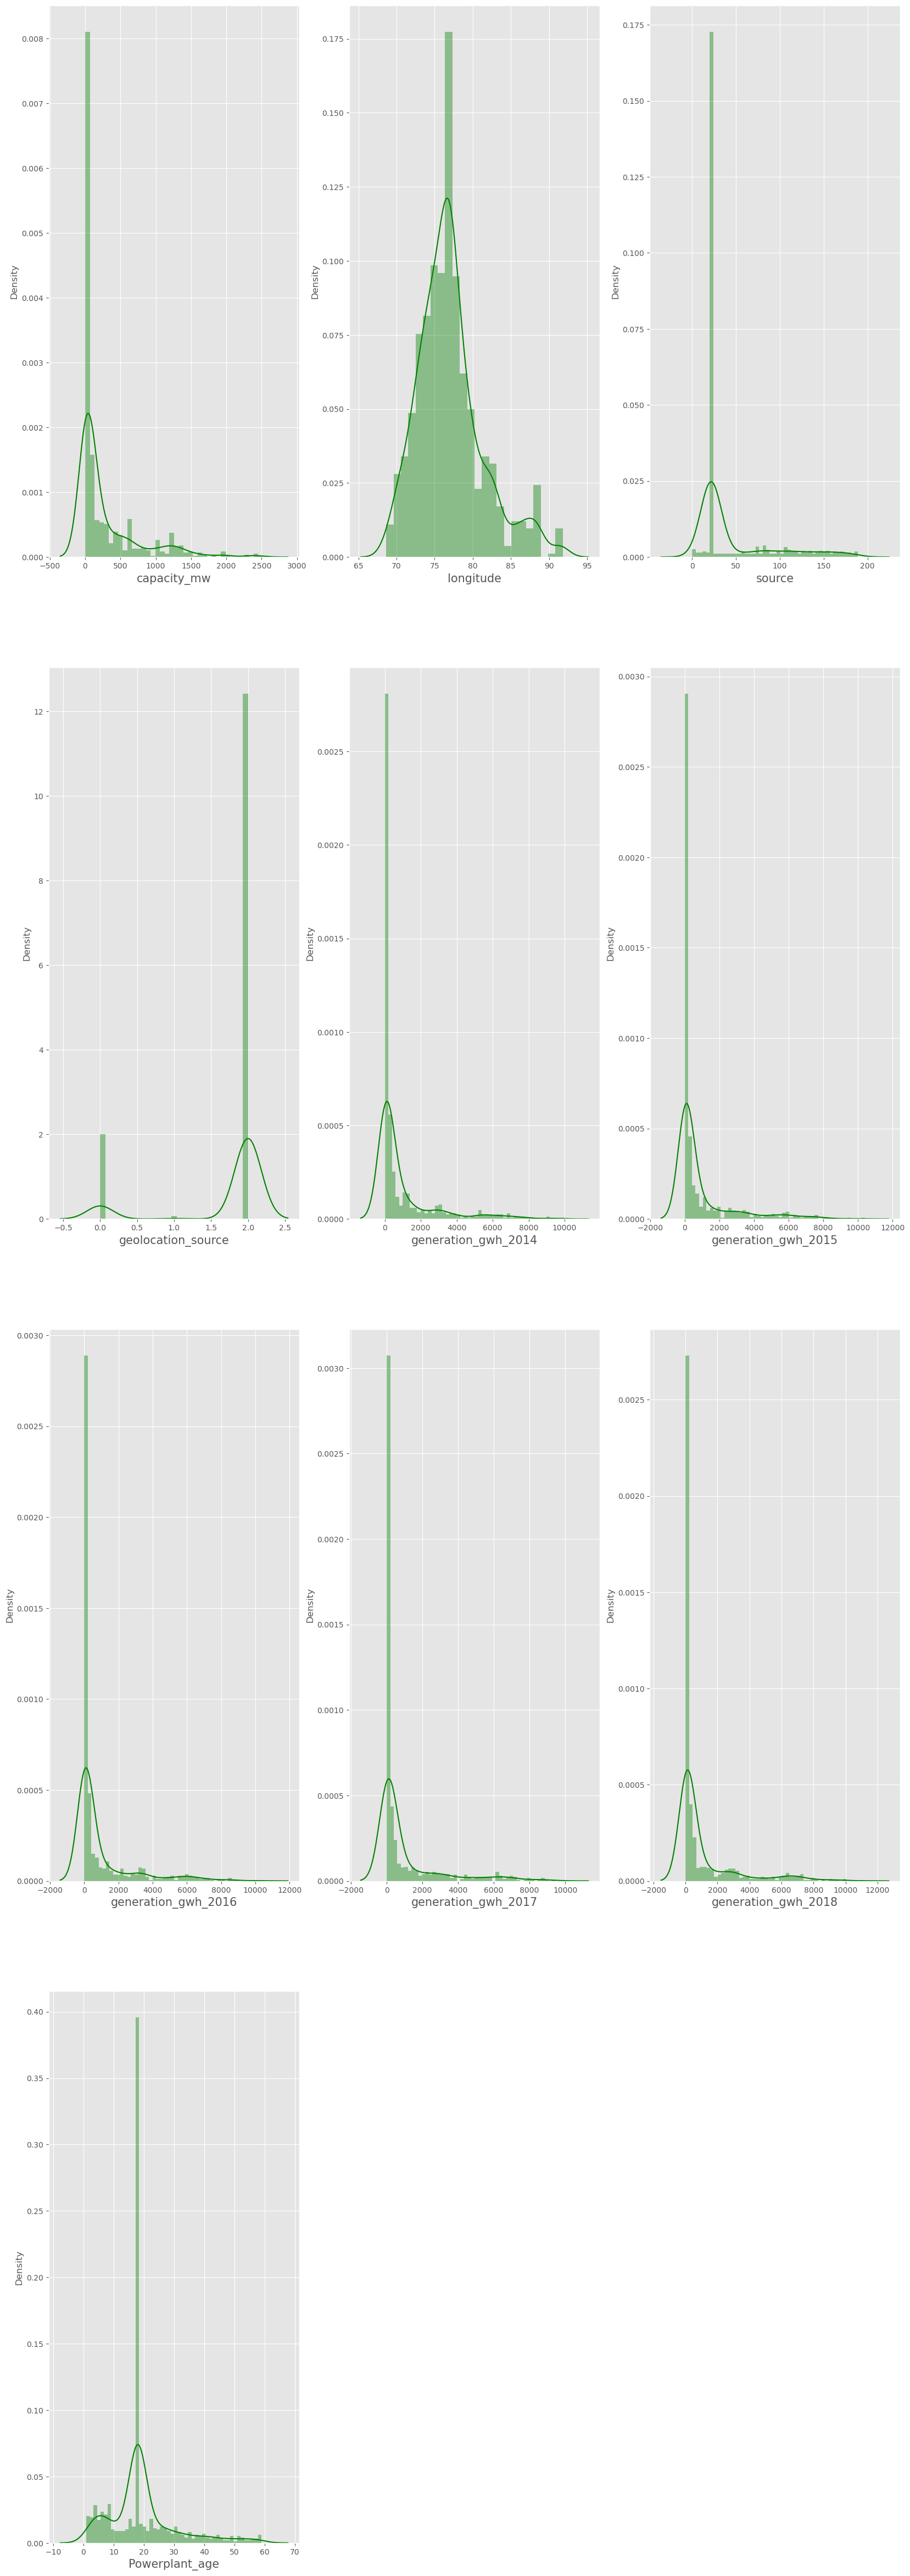

In [85]:
#let plot skewness using distplot


feat=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']]
#Relationship Visualizing

plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

In [86]:
sk_features=["capacity_mw",'longitude','other_fuel1','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df[sk_features] = scaler.fit_transform(new_df[sk_features].values)
new_df[sk_features].head()

,capacity_mw,longitude,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,0.059444,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,0.059444,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,0.059444,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,0.059444,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,0.059444,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [87]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.057972,0.342446,-0.529581,-0.044733,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
latitude,0.057972,1.000000,-0.069975,-0.000886,0.033249,0.060840,-0.207337,0.127853,0.121847,0.152363,0.140021,0.151176,-0.108286
longitude,0.342446,-0.069975,1.000000,-0.413280,0.039861,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
primary_fuel,-0.529581,-0.000886,-0.413280,1.000000,-0.010352,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
other_fuel1,-0.044733,0.033249,0.039861,-0.010352,1.000000,0.024926,-0.024299,0.004380,0.035902,0.058949,0.022587,0.077934,-0.071462
source,-0.334412,0.060840,-0.198453,0.006314,0.024926,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,-0.207337,0.303271,-0.481369,-0.024299,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.127853,0.267497,-0.376449,0.004380,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.121847,0.247803,-0.371171,0.035902,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.152363,0.297372,-0.398699,0.058949,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588


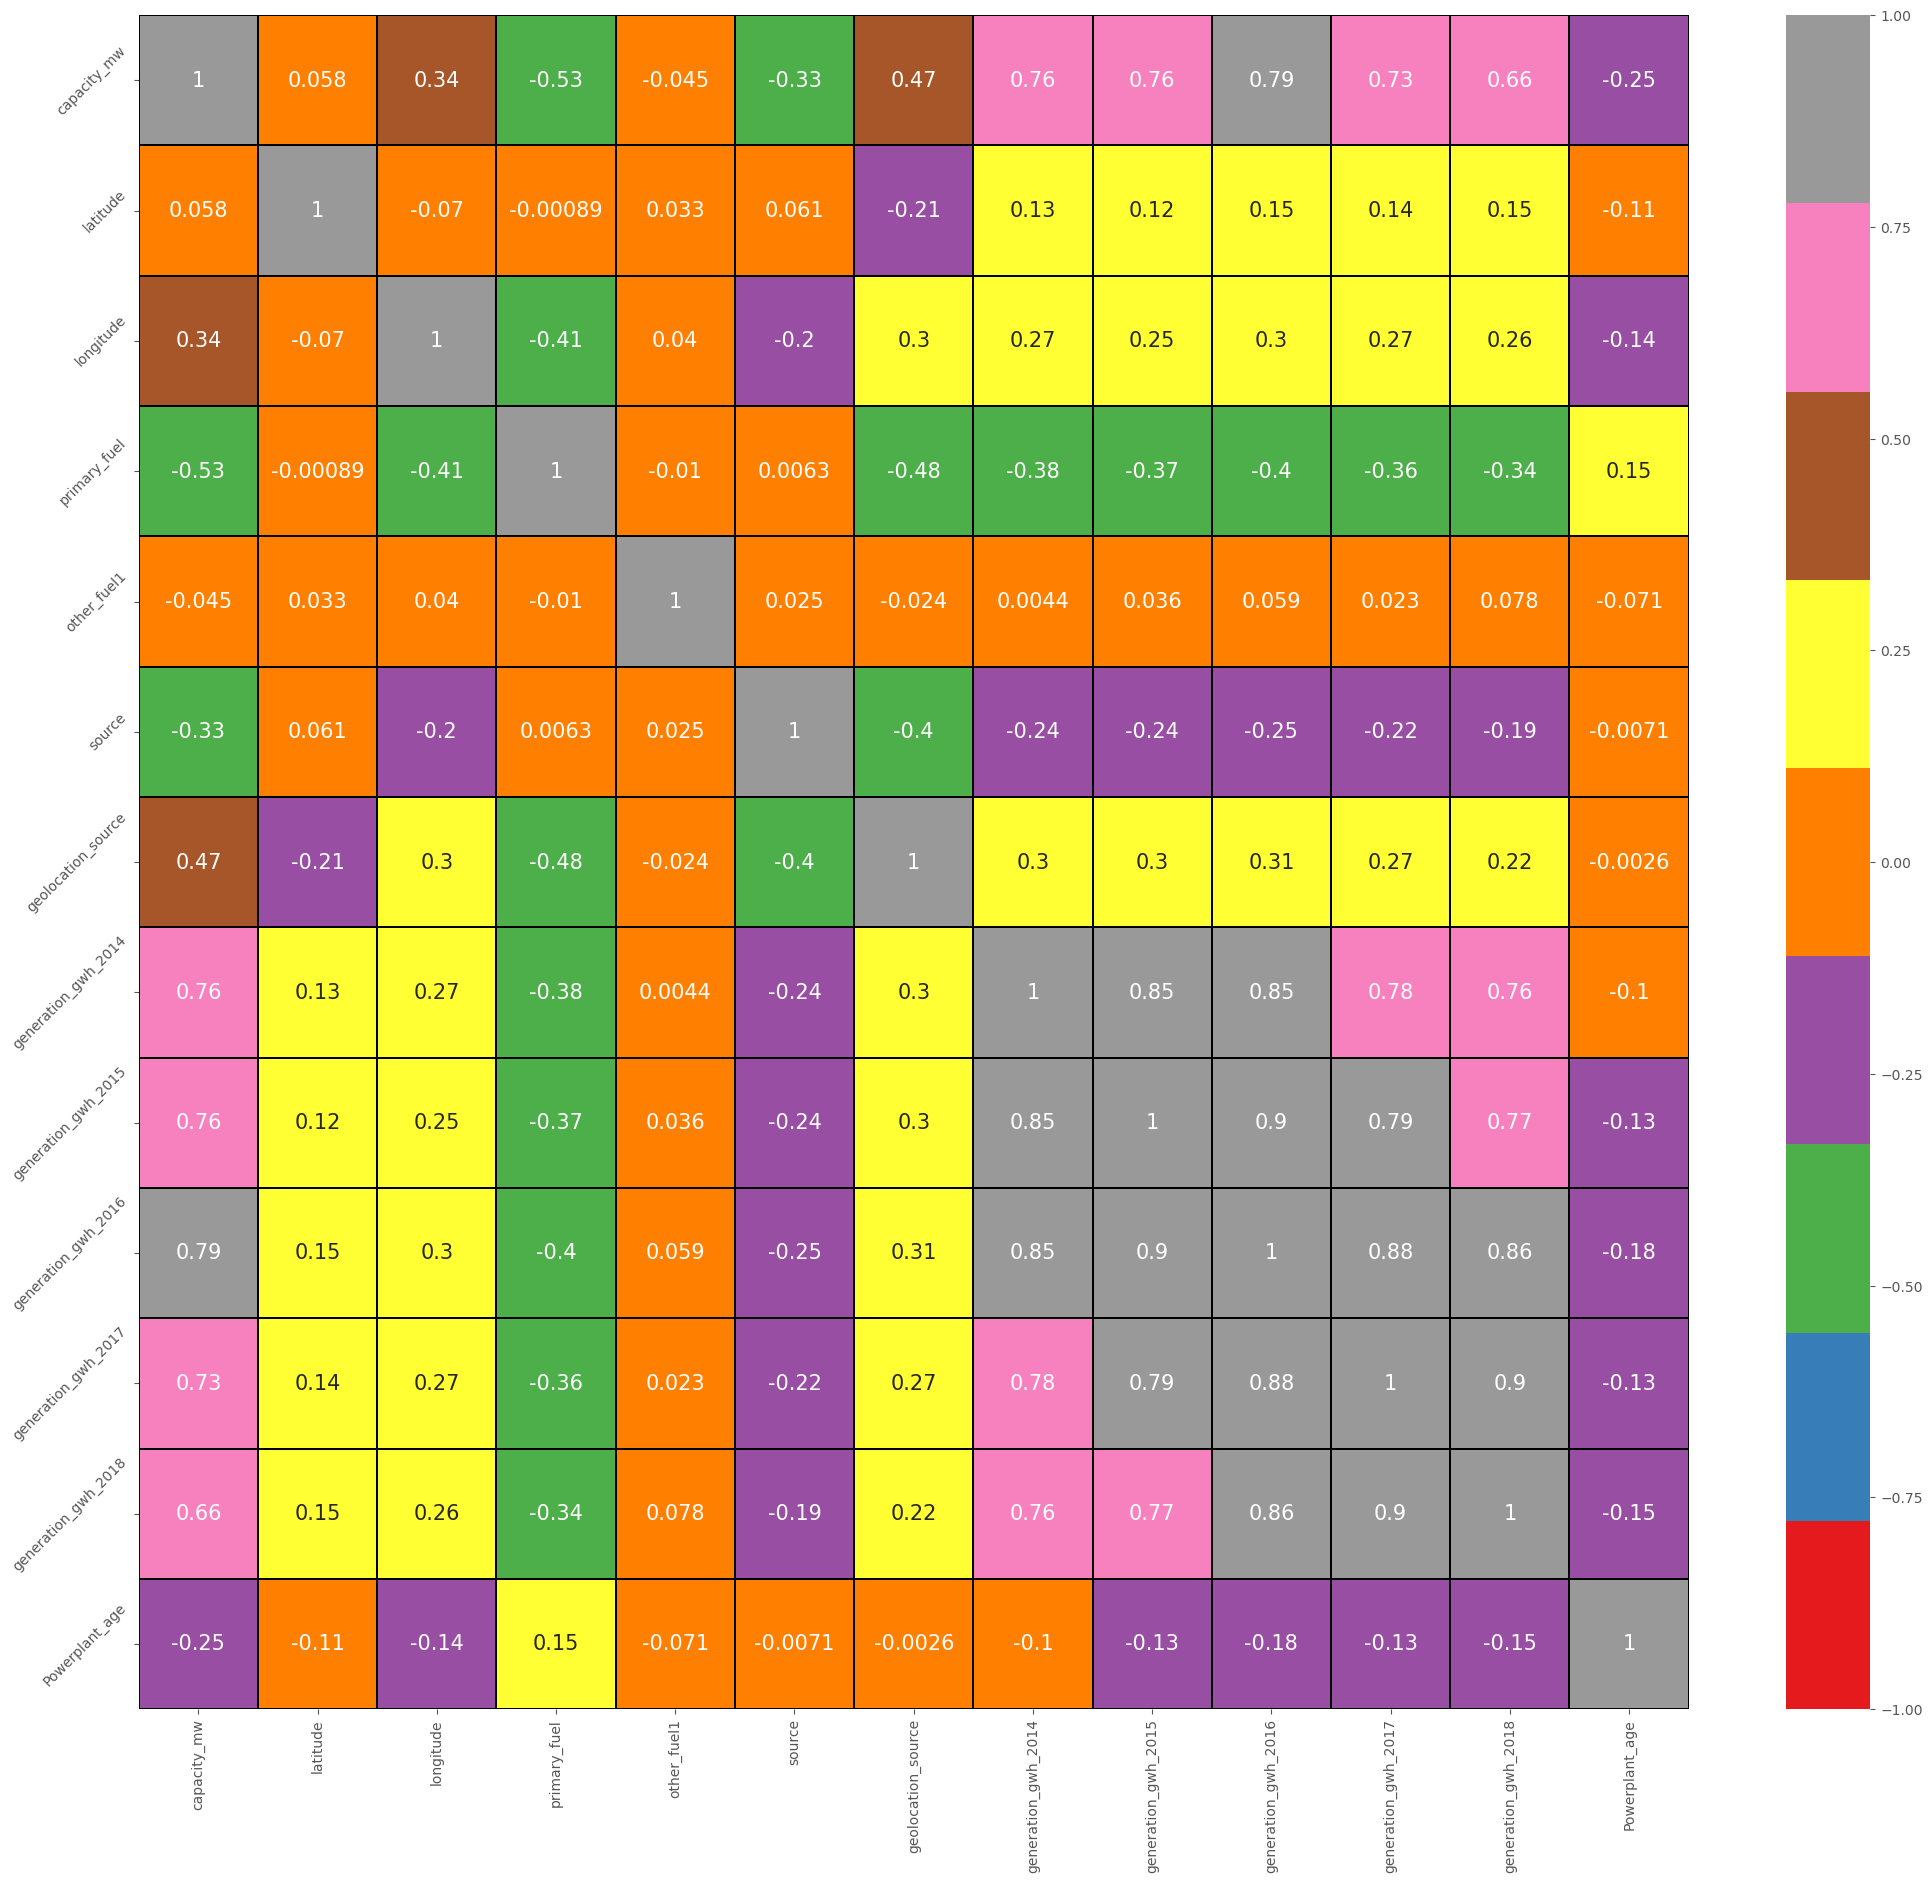

In [88]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")
plt.yticks(rotation=45);

1.The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016

2.generation_gwh_2015, generation_gwh_2014, generation_gwh_2018. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.

3The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

In [89]:
#Let us save one Data Frame for regression problem
Classif_data=new_df

In [90]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [91]:
#Separating label and features 
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']


In [92]:
x.shape

(852, 10)

In [93]:
y.shape

(852,)

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [95]:
# check VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.297178,longitude
1,1.739390,primary_fuel
2,1.361687,source
3,1.662795,geolocation_source
4,4.224308,generation_gwh_2014
5,6.426827,generation_gwh_2015
6,10.785110,generation_gwh_2016
7,7.294450,generation_gwh_2017
8,6.220114,generation_gwh_2018
9,1.078297,Powerplant_age


# Model building

In [96]:
# testing best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9319174576259333  on Random_state  129


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [99]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.9308450065818541
MAE: 0.19700527184039346
MSE: 0.07874301768115609
RMSE: 0.28061186304423424
0.8927522772986247


In [100]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.8705529101092129
MAE: 0.25957763255178806
MSE: 0.14739433819929848
RMSE: 0.38391970280163856
0.8078644337224873


In [101]:
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.9006511015364789
MAE: 0.25059709359517646
MSE: 0.11312316987747278
RMSE: 0.33633788052711633
0.8616248582667231


In [102]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.9273367918116597
MAE: 0.21617609665571696
MSE: 0.08273763042023015
RMSE: 0.28764149634611164
0.9007646303188732


In [103]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.9253447960348374
MAE: 0.20569714672934947
MSE: 0.08500580732145085
RMSE: 0.29155755404628236
0.8818100502972894


In [104]:
# hyparameter tuning
from sklearn.model_selection import GridSearchCV

In [105]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [106]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [107]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_features': 'sqrt'}

In [108]:
capacity_model = GradientBoostingRegressor(criterion='squared_error', learning_rate= 0.1, loss= 'squared_error',max_features= 'sqrt')
capacity_model.fit(x_train, y_train)
pred = capacity_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.28061186304423424
R2_Score: 92.94290556199427


In [109]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity_model,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [110]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_capacity_mw.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,-0.396120,-0.280999
1,-0.458110,-0.420169
2,-0.948842,-1.020419
3,0.165116,0.221678
4,1.523747,1.244458
...,...,...
251,0.860692,1.003678
252,1.698815,1.237459
253,1.377918,0.945363
254,1.593827,1.316049


### Classification for fuel type 

In [111]:
Classif_data.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [112]:
#let us rename 'primary_fuel' to Fuel_Type
Classif_data.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [113]:
Classif_data.corr()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.342446,-0.529581,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
longitude,0.342446,1.000000,-0.413280,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
Fuel_Type,-0.529581,-0.413280,1.000000,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
source,-0.334412,-0.198453,0.006314,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,0.303271,-0.481369,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.267497,-0.376449,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.247803,-0.371171,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.297372,-0.398699,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588
generation_gwh_2017,0.725192,0.273371,-0.356194,-0.224322,0.266767,0.776621,0.793076,0.884353,1.000000,0.904954,-0.131981
generation_gwh_2018,0.658112,0.260847,-0.336625,-0.190145,0.223006,0.755111,0.774797,0.862621,0.904954,1.000000,-0.147871


<Axes: >

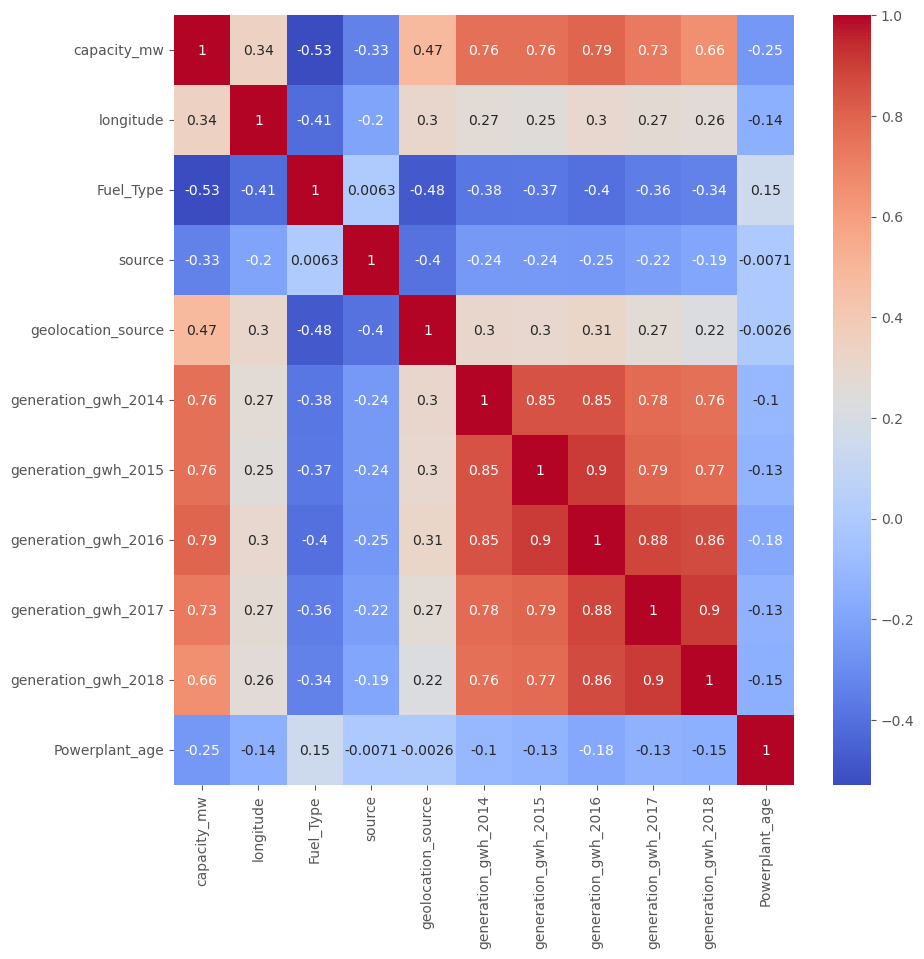

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(Classif_data.corr(), annot = True, linecolor="c",cmap="coolwarm")

In [116]:
Classif_data.drop(columns=['source','longitude'],axis=1,inplace=True)


In [117]:
cl_x=Classif_data.drop("Fuel_Type",axis=1)    #features
cl_y=Classif_data['Fuel_Type']   #Label

In [118]:
cl_x.shape

(852, 8)

In [119]:
cl_y.shape

(852,)

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cl_x= pd.DataFrame(scaler.fit_transform(cl_x), columns=cl_x.columns)
cl_x

,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...
847,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(cl_x.values,i)
              for i in range(len(cl_x.columns))]
vif["Features"] = cl_x.columns

# Let's check the values
vif

,VIF values,Features
0,3.814449,capacity_mw
1,1.350136,geolocation_source
2,4.444195,generation_gwh_2014
3,6.465385,generation_gwh_2015
4,11.077630,generation_gwh_2016
5,7.530329,generation_gwh_2017
6,6.381029,generation_gwh_2018
7,1.139573,Powerplant_age


In [122]:
# let us check whether our label is equaly ditributed
cl_y.value_counts()

Fuel_Type
1    240
3    220
6    126
7    123
2     65
0     50
5     20
4      8
Name: count, dtype: int64

Our Label is not equally distributed so we need to use sampling technique( SMOTE) to make it normal

In [123]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
cl_x, cl_y = SM.fit_resample(cl_x,cl_y)
cl_y.value_counts()

Fuel_Type
6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: count, dtype: int64

In [124]:
#Finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8458333333333333  on Random_state  107


In [125]:
clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.30, random_state =maxRS)

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [127]:
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)

#Prediction
pred = DTC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred))
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())

0.8072916666666666
[[59  4  0  0  0  1  0 10]
 [ 4 39  5  1 10  3  1  0]
 [ 2  4 57 10  1  3  0  0]
 [ 0  8  5 51  3  0  0  1]
 [ 0  1  0  2 67  0  0  0]
 [ 2  1  0  1  2 67  0  0]
 [ 0  1  0  1  0  0 82  0]
 [ 6  8  2  0  0  8  0 43]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.59      0.62      0.60        63
           2       0.83      0.74      0.78        77
           3       0.77      0.75      0.76        68
           4       0.81      0.96      0.88        70
           5       0.82      0.92      0.86        73
           6       0.99      0.98      0.98        84
           7       0.80      0.64      0.71        67

    accuracy                           0.81       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.81      0.81      0.81       576

0.7812500000000001


In [128]:
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

#Prediction
pred = RFC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(RFC,cl_x,cl_y,cv=5).mean()*100)

84.54861111111111
[[59  4  0  0  0  1  0 10]
 [ 4 41  6  2  8  1  0  1]
 [ 2  3 67  0  2  3  0  0]
 [ 0 10  3 52  2  0  0  1]
 [ 0  0  0  1 69  0  0  0]
 [ 1  1  1  0  0 69  0  1]
 [ 0  1  0  1  0  0 82  0]
 [ 6  4  2  0  0  7  0 48]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        74
           1       0.64      0.65      0.65        63
           2       0.85      0.87      0.86        77
           3       0.93      0.76      0.84        68
           4       0.85      0.99      0.91        70
           5       0.85      0.95      0.90        73
           6       1.00      0.98      0.99        84
           7       0.79      0.72      0.75        67

    accuracy                           0.85       576
   macro avg       0.84      0.84      0.84       576
weighted avg       0.85      0.85      0.84       576

Corross Validation Score 82.03125


In [129]:
SVM = SVC()
SVM.fit(clx_train,cly_train)

#Prediction
pred = SVM.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(SVM,cl_x,cl_y,cv=5).mean()*100)

70.13888888888889
[[67  0  0  0  0  0  0  7]
 [ 6 21  6  0 23  0  0  7]
 [ 6  6 51  0  5  1  0  8]
 [ 4  7  9 38  3  0  0  7]
 [ 0  4  1  1 64  0  0  0]
 [15  0  0  0  0 46  0 12]
 [ 0  2  1  0  0  0 81  0]
 [28  0  3  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        74
           1       0.53      0.33      0.41        63
           2       0.72      0.66      0.69        77
           3       0.97      0.56      0.71        68
           4       0.67      0.91      0.78        70
           5       0.98      0.63      0.77        73
           6       1.00      0.96      0.98        84
           7       0.47      0.54      0.50        67

    accuracy                           0.70       576
   macro avg       0.73      0.69      0.69       576
weighted avg       0.74      0.70      0.70       576

Corross Validation Score 66.24999999999999


In [130]:
knn = KNN()
knn.fit(clx_train,cly_train)

#Prediction
pred = knn.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(knn,cl_x,cl_y,cv=5).mean()*100)

78.125
[[64  3  0  0  0  1  0  6]
 [ 5 30  7  2 14  3  0  2]
 [ 2  7 51  1  5  5  0  6]
 [ 0  9  4 49  1  1  0  4]
 [ 0  1  1  1 67  0  0  0]
 [ 2  1  0  0  0 69  0  1]
 [ 0  2  0  1  0  0 81  0]
 [17  1  0  0  0 10  0 39]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        74
           1       0.56      0.48      0.51        63
           2       0.81      0.66      0.73        77
           3       0.91      0.72      0.80        68
           4       0.77      0.96      0.85        70
           5       0.78      0.95      0.85        73
           6       1.00      0.96      0.98        84
           7       0.67      0.58      0.62        67

    accuracy                           0.78       576
   macro avg       0.78      0.77      0.77       576
weighted avg       0.78      0.78      0.78       576

Corross Validation Score 77.29166666666666


In [131]:
BC= BaggingClassifier()
BC.fit(clx_train,cly_train)

#Prediction
pred = BC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(BC,cl_x,cl_y,cv=5).mean()*100)

83.33333333333334
[[60  4  0  0  0  1  0  9]
 [ 4 42  4  2 10  1  0  0]
 [ 2  6 63  2  1  3  0  0]
 [ 0 11  2 53  1  0  0  1]
 [ 0  1  1  1 67  0  0  0]
 [ 1  1  0  1  0 68  0  2]
 [ 0  1  0  2  0  0 81  0]
 [ 6  6  3  0  0  6  0 46]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        74
           1       0.58      0.67      0.62        63
           2       0.86      0.82      0.84        77
           3       0.87      0.78      0.82        68
           4       0.85      0.96      0.90        70
           5       0.86      0.93      0.89        73
           6       1.00      0.96      0.98        84
           7       0.79      0.69      0.74        67

    accuracy                           0.83       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.84      0.83      0.83       576

Corross Validation Score 81.82291666666669


In [132]:
GBC = GradientBoostingClassifier()
GBC.fit(clx_train,cly_train)

#Prediction
pred = GBC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)

82.8125
[[61  1  0  0  0  1  0 11]
 [ 5 35  4  5  9  2  0  3]
 [ 3  1 62  4  2  5  0  0]
 [ 0  6  2 59  1  0  0  0]
 [ 0  1  0  2 67  0  0  0]
 [ 1  1  0  0  0 70  0  1]
 [ 0  0  0  3  0  0 81  0]
 [14  5  2  0  0  4  0 42]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        74
           1       0.70      0.56      0.62        63
           2       0.89      0.81      0.84        77
           3       0.81      0.87      0.84        68
           4       0.85      0.96      0.90        70
           5       0.85      0.96      0.90        73
           6       1.00      0.96      0.98        84
           7       0.74      0.63      0.68        67

    accuracy                           0.83       576
   macro avg       0.82      0.82      0.82       576
weighted avg       0.83      0.83      0.82       576

Corross Validation Score 80.9375


 Capacity_model achived an accuracy of 92%
 
  Fuel_Model achived an accuracy of 80%  